In [29]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

 perform some basic analysis to understand what kind of data we are dealing with 

In [30]:
df = pd.read_csv(r'C:\Users\ndhar\bike_sales_india.csv',on_bad_lines = 'skip')

In [31]:
df.head(5)

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482,2021,556,Petrol,51.73,Third,2021,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796,2019,298,Petrol,54.72,Third,2019,Not Available,Individual,132538.36,Tier 3


In [32]:
df.shape

(10000, 15)

In [33]:
df.isnull().sum()

State                      0
Avg Daily Distance (km)    0
Brand                      0
Model                      0
Price (INR)                0
Year of Manufacture        0
Engine Capacity (cc)       0
Fuel Type                  0
Mileage (km/l)             0
Owner Type                 0
Registration Year          0
Insurance Status           0
Seller Type                0
Resale Price (INR)         0
City Tier                  0
dtype: int64

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    10000 non-null  object 
 1   Avg Daily Distance (km)  10000 non-null  float64
 2   Brand                    10000 non-null  object 
 3   Model                    10000 non-null  object 
 4   Price (INR)              10000 non-null  int64  
 5   Year of Manufacture      10000 non-null  int64  
 6   Engine Capacity (cc)     10000 non-null  int64  
 7   Fuel Type                10000 non-null  object 
 8   Mileage (km/l)           10000 non-null  float64
 9   Owner Type               10000 non-null  object 
 10  Registration Year        10000 non-null  int64  
 11  Insurance Status         10000 non-null  object 
 12  Seller Type              10000 non-null  object 
 13  Resale Price (INR)       10000 non-null  float64
 14  City Tier              

In [35]:
df.nunique()

State                         10
Avg Daily Distance (km)     5535
Brand                          8
Model                         40
Price (INR)                 9863
Year of Manufacture           10
Engine Capacity (cc)         901
Fuel Type                      3
Mileage (km/l)              5404
Owner Type                     3
Registration Year             10
Insurance Status               3
Seller Type                    2
Resale Price (INR)         10000
City Tier                      4
dtype: int64

In [36]:
df['Model'].value_counts()



Model
Ray ZR             279
NTorq 125          271
Duke 200           270
250 Duke           269
Vulcan S           267
MT-15              267
Classic 350        267
Interceptor 650    264
Pulsar 150         261
Versys 650         261
Hunter 350         259
Glamour            258
Sport              258
Unicorn            257
HF Deluxe          257
FZ V3              256
Ninja 300          256
Ninja 400          255
390 Adventure      254
Z650               252
Ronin              252
Himalayan          249
Avenger 220        249
Xtreme 160R        249
Fascino 125        248
CBR 650R           248
RC 390             248
Passion Pro        247
Shine              244
Dio                242
CT 100             236
Dominar 400        233
R15 V4             233
125 Duke           231
Activa             230
Splendor Plus      228
Platina 110        228
Apache RTR 160     227
Jupiter            226
Meteor 350         214
Name: count, dtype: int64

In [37]:
df.loc[df['Model'] == 'Ray ZR', 'Price (INR)']

27      296387
40      292817
107     396806
141     161061
193     167945
         ...  
9807    121226
9836    199111
9852    168319
9854    146445
9982    143881
Name: Price (INR), Length: 279, dtype: int64

In [38]:
grouped_df = df.groupby(['Model', 'Year of Manufacture'])['Price (INR)'].sum().reset_index()
print(grouped_df)

        Model  Year of Manufacture  Price (INR)
0    125 Duke                 2015      5659464
1    125 Duke                 2016      4444360
2    125 Duke                 2017      5608320
3    125 Duke                 2018      5620146
4    125 Duke                 2019      5433447
..        ...                  ...          ...
395      Z650                 2020      5601954
396      Z650                 2021      4924408
397      Z650                 2022      4937010
398      Z650                 2023      7574344
399      Z650                 2024      8147074

[400 rows x 3 columns]


In [39]:
grouped_df.query("Model == 'Activa'")


,Model,Year of Manufacture,Price (INR)
30,Activa,2015,7231630
31,Activa,2016,4074325
32,Activa,2017,5000323
33,Activa,2018,5106889
34,Activa,2019,5412718
35,Activa,2020,6524881
36,Activa,2021,5040153
37,Activa,2022,4090129
38,Activa,2023,4877533
39,Activa,2024,5652122


I have conducted a comprehensive analysis of various bike models, detailing the annual sales figures for each model.

In [40]:

import ipywidgets as widgets 
from IPython.display import display

In [57]:
output = widgets.Output()

model_dropdown = widgets.Dropdown(options=df["Model"].unique(),value=df["Model"].unique()[0],description='Model:')

def plot_bar_graph(model_name):
    filtered_df = df[df["Model"] == model_name]
    
    yearly_price_sum = filtered_df.groupby("Year of Manufacture")["Price (INR)"].sum().reset_index()

    with output:
        output.clear_output(wait=True)  
        plt.figure(figsize=(11, 5))
        
        bars = plt.bar(yearly_price_sum["Year of Manufacture"], 
                       yearly_price_sum["Price (INR)"], color='blue')
        plt.xlabel("Year of Manufacture")
        plt.ylabel("Total Price (INR)")
        plt.title(f"Total Price Trend for {model_name} by Year")
        plt.xticks(yearly_price_sum["Year of Manufacture"])  
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.ylim(0, yearly_price_sum["Price (INR)"].max() + 100000)
        
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 5000, f'{yval:.0f}',ha='center', va='bottom', fontsize=10)

        plt.tight_layout()
        plt.show()
def update_plot(change):
    plot_bar_graph(change['new'])


model_dropdown.observe(update_plot, names='value')


display(model_dropdown, output)

plot_bar_graph(df["Model"].unique()[0])


Dropdown(description='Model:', options=('Hunter 350', 'Dominar 400', '125 Duke', 'Ninja 300', 'FZ V3', 'Splend…

Output()

This analysis was conducted by evaluating the number of bikes sold by each company

In [42]:
df.columns

Index(['State', 'Avg Daily Distance (km)', 'Brand', 'Model', 'Price (INR)',
       'Year of Manufacture', 'Engine Capacity (cc)', 'Fuel Type',
       'Mileage (km/l)', 'Owner Type', 'Registration Year', 'Insurance Status',
       'Seller Type', 'Resale Price (INR)', 'City Tier'],
      dtype='object')

In [43]:
brand_model_count = df.groupby("Brand")["Model"].nunique()

print(brand_model_count)

Brand
Bajaj            5
Hero             5
Honda            5
KTM              5
Kawasaki         5
Royal Enfield    5
TVS              5
Yamaha           5
Name: Model, dtype: int64


In [44]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [58]:
brand_dropdown = widgets.Dropdown(options=df["Brand"].unique(),description="Select Brand:")

output = widgets.Output()

def plot_pie_chart(brand):
    brand_df = df[df["Brand"] == brand]
    model_counts = brand_df["Model"].value_counts()
    
    output.clear_output(wait=True)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(model_counts.values, labels=model_counts.index, autopct='%1.1f%%')
    ax.set_title(f"Model Distribution for {brand}")
    
    with output:
        display(fig)
    plt.close(fig)

def on_brand_change(change):
    if change['name'] == 'value' and change['new'] is not None:
        print("New brand selected:", change['new'])
        plot_pie_chart(change['new'])

brand_dropdown.observe(on_brand_change, names='value')

display(brand_dropdown, output)

plot_pie_chart(brand_dropdown.value)


Dropdown(description='Select Brand:', options=('Royal Enfield', 'Bajaj', 'KTM', 'Kawasaki', 'Yamaha', 'Hero', …

Output()

A comprehensive analysis was performed to evaluate the performance of various bike (Average Daily Distance [KM]) models across different states.

In [59]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [60]:
ktm_duke200_df = df[(df["Brand"] == "KTM") & (df["Model"] == "Duke 200")]

In [61]:
ktm_duke200_df['State'].unique()

array(['West Bengal', 'Tamil Nadu', 'Karnataka', 'Rajasthan', 'Punjab',
       'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Delhi',
       'Uttar Pradesh'], dtype=object)

In [62]:
ktm_duke200_df.head(5)

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
51,West Bengal,28.27,KTM,Duke 200,217205,2019,270,Hybrid,64.06,Second,2021,Not Available,Dealer,141079.28,Tier 3
169,Tamil Nadu,71.63,KTM,Duke 200,320626,2022,270,Petrol,46.57,Third,2023,Not Available,Dealer,156453.23,Tier 1
198,West Bengal,27.60,KTM,Duke 200,398287,2016,479,Hybrid,86.01,Third,2017,Active,Individual,274925.10,Metro
239,Karnataka,28.34,KTM,Duke 200,241646,2024,390,Hybrid,72.21,Second,2024,Not Available,Dealer,97027.78,Tier 2
252,Rajasthan,12.37,KTM,Duke 200,278881,2023,298,Petrol,35.77,Second,2023,Not Available,Dealer,203228.28,Tier 2


In [63]:
mean_distance = df.groupby("State")["Avg Daily Distance (km)"].mean().reset_index()


In [64]:
mean_distance

,State,Avg Daily Distance (km)
0,Delhi,41.336192
1,Gujarat,41.627814
2,Karnataka,42.746925
3,Madhya Pradesh,42.866033
4,Maharashtra,42.134282
5,Punjab,42.831931
6,Rajasthan,43.149882
7,Tamil Nadu,42.998189
8,Uttar Pradesh,42.921097
9,West Bengal,42.698723


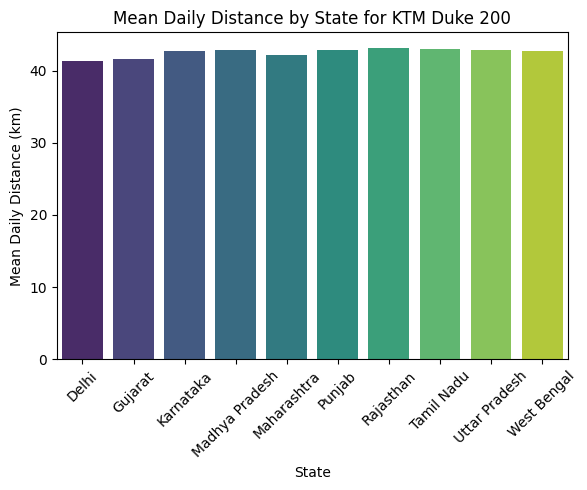

In [65]:
plt.figure(figsize=(6, 5))
sns.barplot(x="State", y="Avg Daily Distance (km)", data=mean_distance, palette="viridis")
plt.title("Mean Daily Distance by State for KTM Duke 200")
plt.xlabel("State")
plt.ylabel("Mean Daily Distance (km)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
def plot_mean_distance_by_state(brand, model):
    filtered_df = df[(df["Brand"] == brand) & (df["Model"] == model)]
    if filtered_df.empty:
        print(f"No data found for {brand} {model}.")
        return
    mean_distance = filtered_df.groupby("State")["Avg Daily Distance (km)"].mean().reset_index()
    plt.figure(figsize=(6, 5))
    ax = sns.barplot(x="State", y="Avg Daily Distance (km)", data=mean_distance, palette="viridis")
    plt.title(f"Mean Daily Distance by State for {brand} {model}")
    plt.xlabel("State")
    plt.ylabel("Mean Daily Distance (km)")
    plt.xticks(rotation=45)
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',xy=(bar.get_x() + bar.get_width() / 2, height),xytext=(0, 5),textcoords="offset points",ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [67]:
df['Brand'].unique()

array(['Royal Enfield', 'Bajaj', 'KTM', 'Kawasaki', 'Yamaha', 'Hero',
       'TVS', 'Honda'], dtype=object)

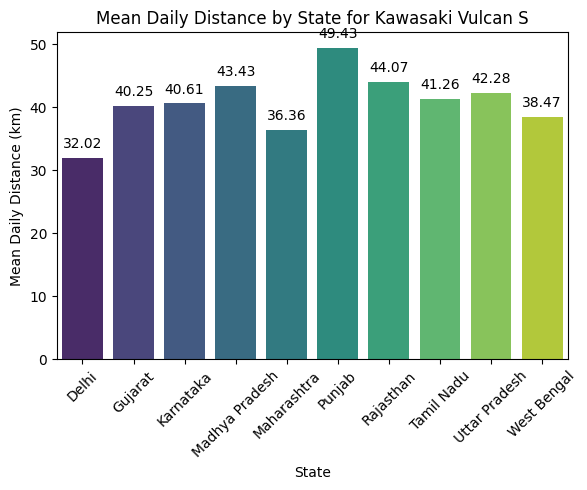

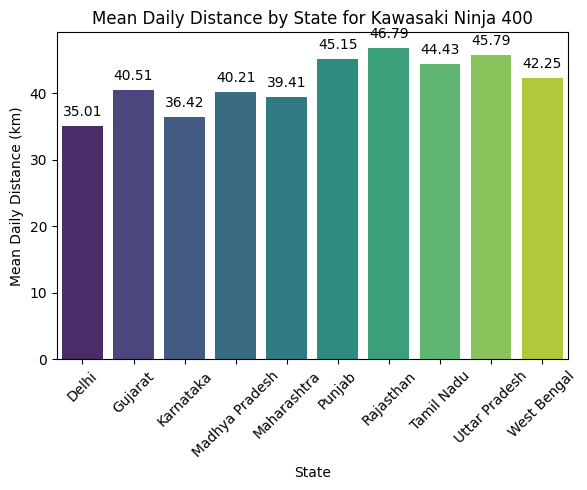

In [68]:
plot_mean_distance_by_state('Kawasaki', 'Vulcan S')
plot_mean_distance_by_state('Kawasaki', 'Ninja 400')

In [70]:
def plot_mean_distance_by_state(brand, model):
    filtered_df = df[(df["Brand"] == brand) & (df["Model"] == model)]    
    if filtered_df.empty:
        print(f"No data found for {brand} {model}.")
        return
    mean_distance = filtered_df.groupby("State")["Avg Daily Distance (km)"].mean().reset_index()
    plt.figure(figsize=(11, 6))
    ax = sns.barplot(x="State", y="Avg Daily Distance (km)", data=mean_distance, palette="viridis")
    plt.title(f"Mean Daily Distance by State for {brand} {model}")
    plt.xlabel("State")
    plt.ylabel("Mean Daily Distance (km)")
    plt.xticks(rotation=45)
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',xy=(bar.get_x() + bar.get_width() / 2, height),xytext=(0, 5),textcoords="offset points",ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
brand_options = sorted(df["Brand"].unique())
brand_dropdown = widgets.Dropdown(options=brand_options,value=brand_options[0],description="Brand:")

def get_models_for_brand(brand):
    return sorted(df[df["Brand"] == brand]["Model"].unique())
initial_models = get_models_for_brand(brand_dropdown.value)
model_dropdown = widgets.Dropdown(options=initial_models,value=initial_models[0] if initial_models else None,description="Model:")
output = widgets.Output()
def update_models(change):
    selected_brand = change['new']
    models = get_models_for_brand(selected_brand)
    model_dropdown.options = models
    if models:
        model_dropdown.value = models[0]
    else:
        model_dropdown.value = None

brand_dropdown.observe(update_models, names="value")
def update_graph(change):
    with output:
        output.clear_output(wait=True)
        plot_mean_distance_by_state(brand_dropdown.value, model_dropdown.value)

model_dropdown.observe(update_graph, names="value")
display(brand_dropdown, model_dropdown, output)


Dropdown(description='Brand:', options=('Bajaj', 'Hero', 'Honda', 'KTM', 'Kawasaki', 'Royal Enfield', 'TVS', '…

Dropdown(description='Model:', options=('Avenger 220', 'CT 100', 'Dominar 400', 'Platina 110', 'Pulsar 150'), …

Output()